In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('../friendsfamilytest/data/data.csv')
data.head()

,time,rating,free_text,do_better,surgery,sentiment_free_text,sentiment_score_free_text,sentiment_do_better,sentiment_score_do_better,free_text_len,do_better_len,rating_score,feedback_labels,improvement_labels
0,2023-07-13 15:28:22,Extremely likely,Very friendly caring staff treated me with res...,NaN,Earls Court Surgery,positive,0.892932,neutral,0.000000,13.0,3,5.0,Staff Empathy and Compassion,NaN
1,2023-07-13 15:29:16,Extremely likely,NaN,NaN,Earls Court Surgery,neutral,0.000000,neutral,0.000000,4.0,0,5.0,NaN,NaN
2,2023-07-13 15:29:21,Extremely likely,The doctor was very understanding and very kno...,NaN,Earls Court Surgery,positive,0.969175,neutral,0.000000,8.0,5,5.0,Patient Respect,NaN
3,2023-07-13 15:30:10,Extremely likely,NaN,NaN,Earls Court Surgery,neutral,0.000000,neutral,0.000000,5.0,5,5.0,NaN,NaN
4,2023-07-13 15:31:48,Extremely likely,I was spoken to politely on the phone and a te...,No I was happy with everything,Earls Court Surgery,neutral,0.756987,positive,0.837488,44.0,6,5.0,Follow-up and Continuity of Care,Patient Respect


In [ ]:
palette = {'positive': '#2e5f77', 'negative': '#d7662a', 'neutral': '#eda73b'}
hue_order = ['positive', 'neutral', 'negative']
category_counts = data['feedback_labels'].value_counts()
order = category_counts.index  

In [14]:
category_counts

Staff Professionalism                285
Patient Respect                      249
Follow-up and Continuity of Care     196
Reception Staff Interaction          173
Appointment Availability             159
Staff Empathy and Compassion         100
Accessibility and Convenience         95
Treatment Quality                     89
Waiting Time                          60
Test Results                          35
Vaccinations                          16
Environment and Ambiance              15
Communication Effectiveness           12
Facility Cleanliness                   7
Patient Education and Information      6
Feedback and Complaints Handling       3
Surgery Website                        3
Name: feedback_labels, dtype: int64

In [15]:
order

Index(['Staff Professionalism', 'Patient Respect',
       'Follow-up and Continuity of Care', 'Reception Staff Interaction',
       'Appointment Availability', 'Staff Empathy and Compassion',
       'Accessibility and Convenience', 'Treatment Quality', 'Waiting Time',
       'Test Results', 'Vaccinations', 'Environment and Ambiance',
       'Communication Effectiveness', 'Facility Cleanliness',
       'Patient Education and Information', 'Feedback and Complaints Handling',
       'Surgery Website'],
      dtype='object')

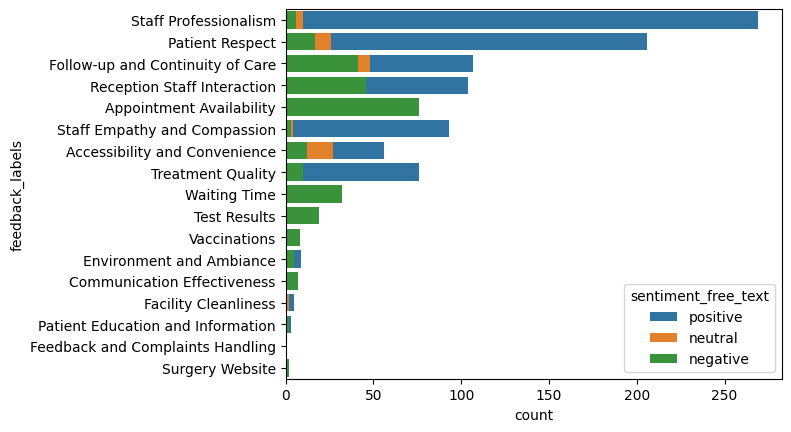

In [ ]:
sns.countplot(data=data, y='feedback_labels', hue='sentiment_free_text', hue_order=hue_order, order=order, dodge=False)
plt.show()

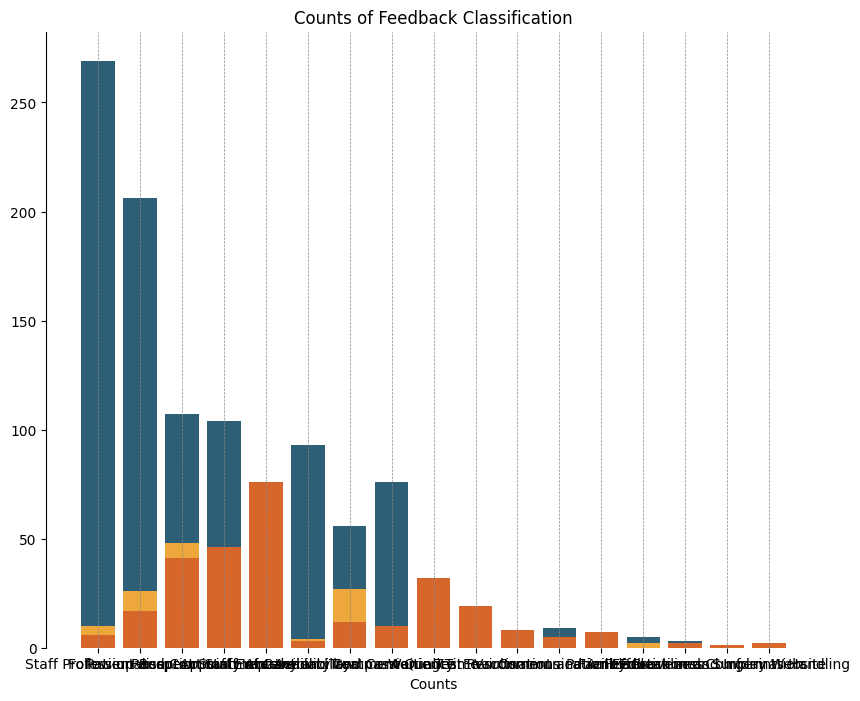

In [20]:
palette = {'positive': '#2e5f77', 'negative': '#d7662a', 'neutral': '#eda73b'}
hue_order = ['positive', 'neutral', 'negative']

category_counts = data['feedback_labels'].value_counts()
order = category_counts.index

# Create separate countplots for each sentiment category
plt.figure(figsize=(10, 8))
ax = plt.gca()

for i, sentiment in enumerate(hue_order):
    counts = data[data['sentiment_free_text'] == sentiment]['feedback_labels'].value_counts()
    counts = counts.reindex(order, fill_value=0)
    plt.bar(counts.index, counts, color=palette[sentiment], label=sentiment, bottom=i*0.01)

ax.xaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
ax.yaxis.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_visible(False)

# Adding titles and labels for clarity
plt.title("Counts of Feedback Classification")
plt.xlabel("Counts")
plt.ylabel("")

# Streamlit function to display matplotlib figures
plt.show()

<Figure size 1000x800 with 0 Axes>

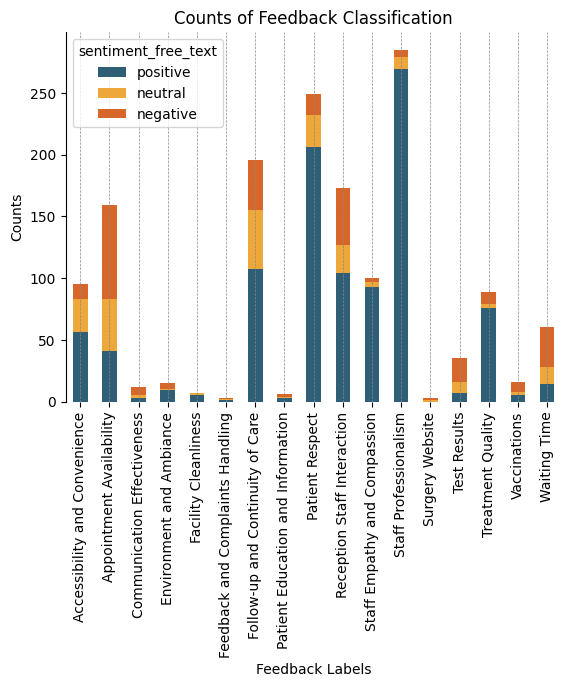

In [21]:
palette = {'positive': '#2e5f77', 'negative': '#d7662a', 'neutral': '#eda73b'}
hue_order = ['positive', 'neutral', 'negative']

# Create a cross-tabulation of feedback labels and sentiment categories
crosstab = pd.crosstab(data['feedback_labels'], data['sentiment_free_text'])
crosstab = crosstab.reindex(columns=hue_order)

# Create a stacked bar plot using the cross-tabulation
plt.figure(figsize=(10, 8))
ax = crosstab.plot(kind='bar', stacked=True, color=palette)

ax.xaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
ax.yaxis.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_visible(False)

# Adding titles and labels for clarity
plt.title("Counts of Feedback Classification")
plt.xlabel("Feedback Labels")
plt.ylabel("Counts")

# Streamlit function to display matplotlib figures
plt.show()